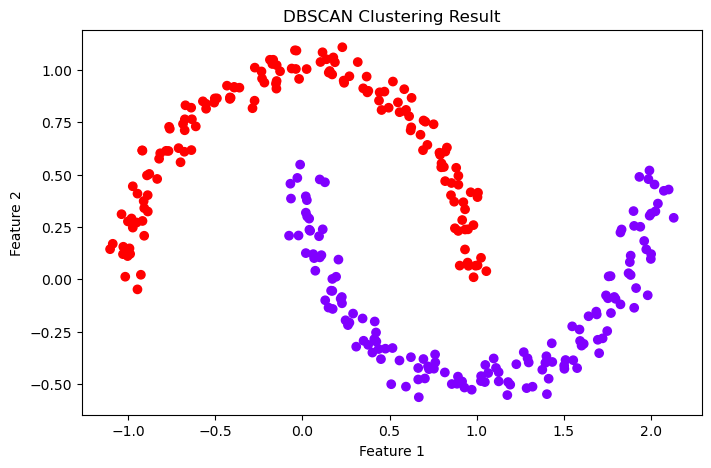

In [2]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Step 2: Create synthetic dataset
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Step 3: Apply DBSCAN Algorithm
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_pred = dbscan.fit_predict(X)

# Step 4: Visualize the result
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='rainbow')
plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

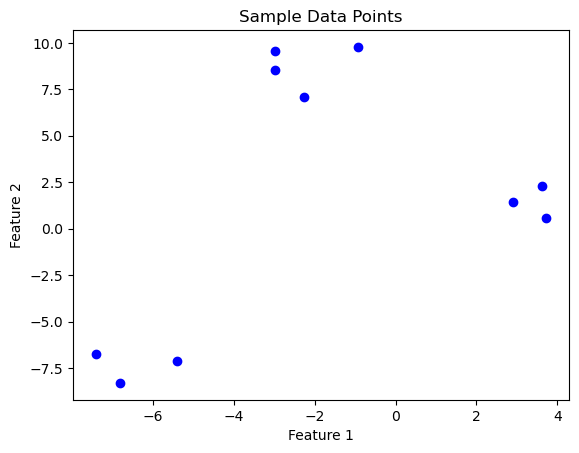

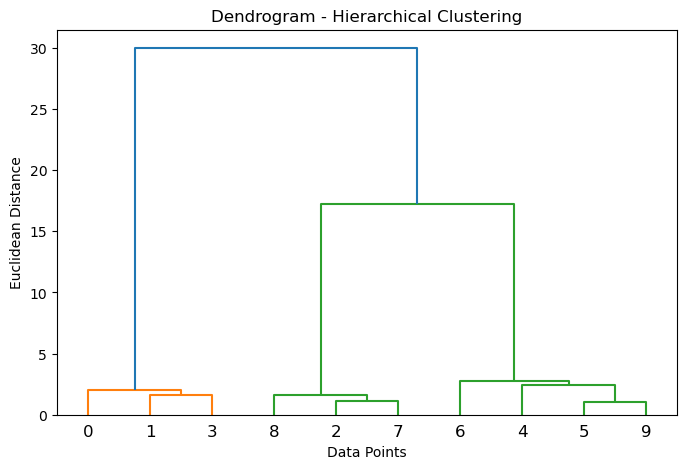

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [1]:
# Step 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# Step 2: Create Synthetic Dataset
X, y = make_blobs(n_samples=10, centers=3, random_state=42, cluster_std=1.0)

# Step 3: Plot Raw Data
plt.scatter(X[:, 0], X[:, 1], color='blue')
plt.title("Sample Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 4: Create and Plot Dendrogram
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 5: Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_pred = hc.fit_predict(X)

# Step 6: Visualize Final Clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='rainbow')
plt.title("Hierarchical Clustering Result (3 Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


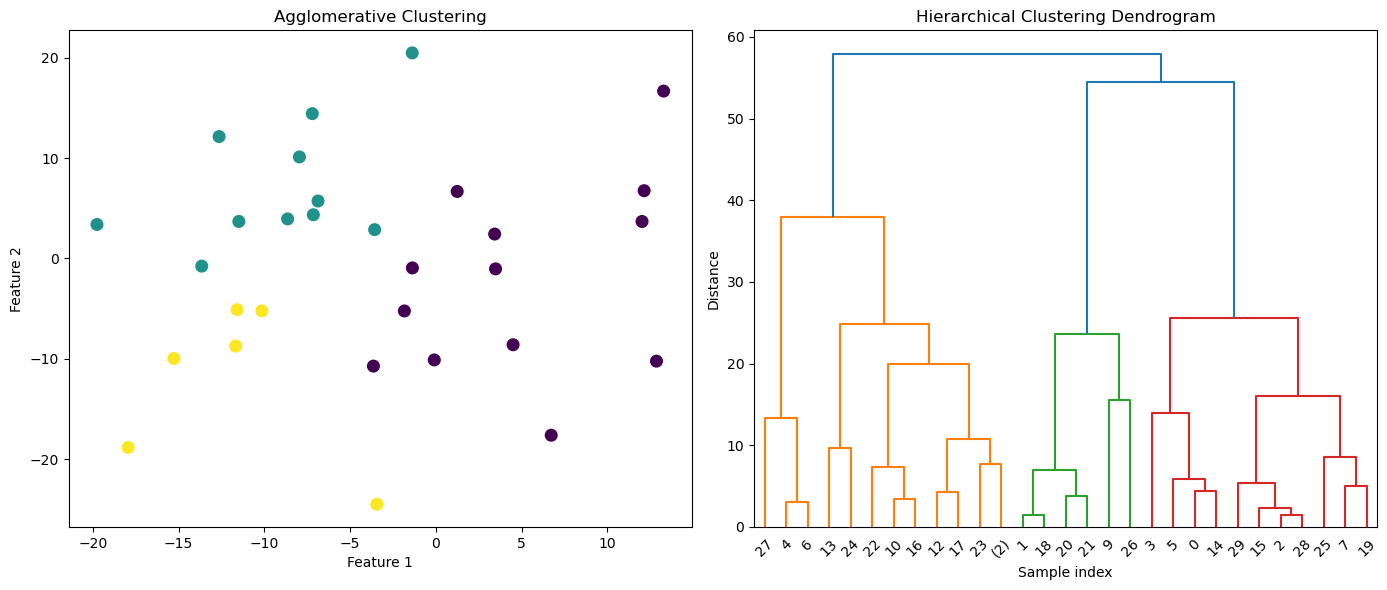

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=30, centers=3, cluster_std=10, random_state=42)

clustering = AgglomerativeClustering(n_clusters=3)
labels = clustering.fit_predict(X)

agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg.fit(X)


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=70)
ax1.set_title("Agglomerative Clustering")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

plt.sca(ax2)
plot_dendrogram(agg, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")

plt.tight_layout()
plt.show()